In [1]:
from ctapipe.io import event_source
from scipy.linalg import svd
from ctapipe.utils import get_dataset
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from ctapipe.visualization import CameraDisplay
import hipecta
from ctapipe.image import convert_geometry_hex1d_to_rect2d

In [2]:
filename = get_dataset('gamma_test.simtel.gz')

In [3]:
source = event_source(filename)

In [4]:
source.max_events = 2

In [5]:
events = [deepcopy(event) for event in source]

In [6]:
event = events[1]

In [7]:
tel_id = list(event.r0.tels_with_data)[0]
image = event.r0.tel[tel_id].image[0]
camera = event.inst.subarray.tel[tel_id].camera

In [19]:
plt.imshow(image.reshape(np.sqrt(2048), np.sqrt(2048)))

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [36]:
camera.make_rectangular(45,45)

CameraGeometry(cam_id='-1', pix_type='rectangular', npix=2025, cam_rot=0.0 deg, pix_rot=0.0 deg)

In [33]:
camera

CameraGeometry(cam_id='NectarCam', pix_type='hexagonal', npix=1855, cam_rot=0.0 deg, pix_rot=100.893 deg)

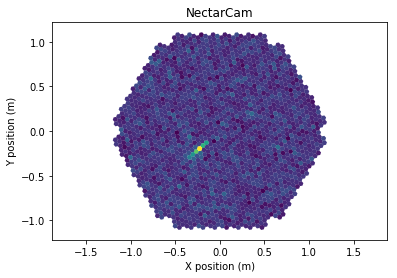

In [8]:
CameraDisplay(camera, image)

In [21]:
square_geom, square = convert_geometry_hex1d_to_rect2d(camera, image)

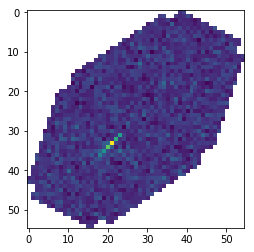

In [44]:
plt.imshow(square)

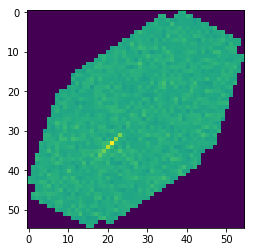

In [43]:
plt.imshow(np.nan_to_num(square))

In [25]:
SVD = svd(np.nan_to_num(square))

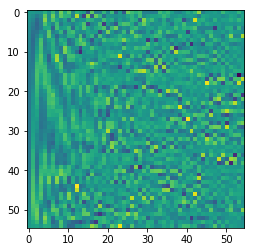

In [31]:
plt.imshow(SVD[0])

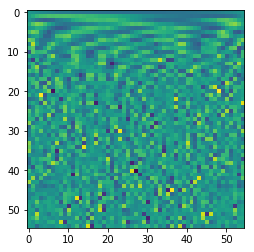

In [32]:
plt.imshow(SVD[2])

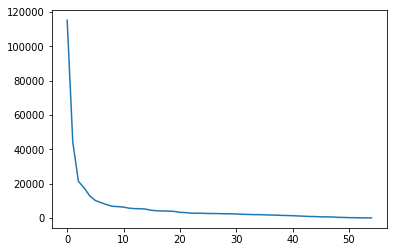

In [35]:
plt.plot(SVD[1])

In [41]:
# create m x n Sigma matrix
Sigma = np.zeros((square.shape[0], square.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:square.shape[1], :square.shape[1]] = np.diag(SVD[1])
# reconstruct matrix
B = SVD[0].dot(Sigma.dot(SVD[2]))

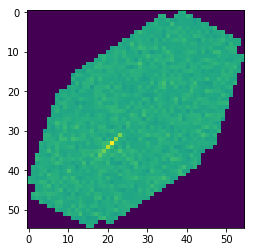

In [42]:
plt.imshow(B)

In [53]:
# create m x n Sigma matrix
reduced_svd = deepcopy(SVD[1])
reduced_svd[4:] = 0
Sigma = np.diag(reduced_svd)
# reconstruct matrix
C = SVD[0].dot(Sigma.dot(SVD[2]))

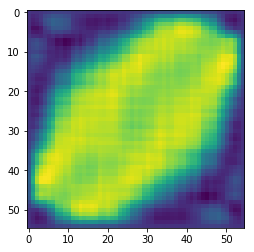

In [54]:
plt.imshow(C)

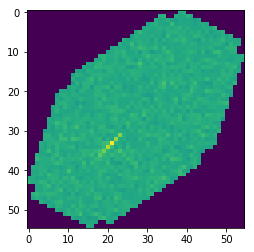

In [98]:
from sklearn.decomposition import TruncatedSVD

# svd
svd = TruncatedSVD(n_components=54)
svd.fit(np.nan_to_num(square))
svd.singular_values_[20:] = 0
result = svd.transform(np.nan_to_num(square))
Sigma = np.zeros_like(square)
Sigma[:result.shape[0],:result.shape[1]] = result
B = SVD[0].dot(Sigma.dot(SVD[2]))
plt.imshow(svd.inverse_transform(result))

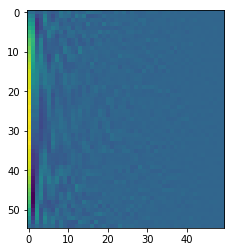

In [97]:
plt.imshow(result)

In [102]:
import sklearn

In [106]:
pca = sklearn.decomposition.PCA()

X = np.nan_to_num(square)
pca.fit(X)

nComp = 2
Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
# Xhat += mu

# print(Xhat[0,])
pca.components_.shape

(55, 55)

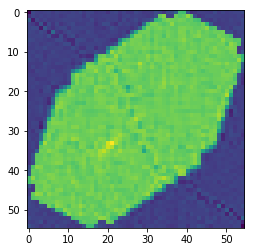

In [114]:
pca = sklearn.decomposition.PCA(n_components=20)
pca.fit(X)
components = pca.transform(X)
filtered = pca.inverse_transform(components)
plt.imshow(filtered)